In [104]:
#In the Loan data set, I tried to create a model to predict the chance of someone getting a loan. The majority of the code is cleaning and imputing data.
#Importing libraries
import pandas as pd #reading csv files
import numpy as np #linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
%matplotlib inline

#Reading the Loans dataset
df = pd.read_csv("/users/David Pei/Downloads/train_u6lujuX_CVtuZ9i.csv", index_col = "Loan_ID")
dftest = pd.read_csv("/users/David Pei/Downloads/test_Y3WMUE5_7gLdaTN.csv", index_col = "Loan_ID")

In [105]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [106]:
#Changing datatypes from int to float and from object to categorical will save computing memory. 
#But this is not an issue now, just good practice for bigger dfs

In [107]:
#Let's look at the columns in df
df.head(10) 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y


In [108]:
#Get a general sense of the dataframe - numerical columns only.
#Makes sense that Loan Amount and Income are positively correlated
df.describe(include = 'all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


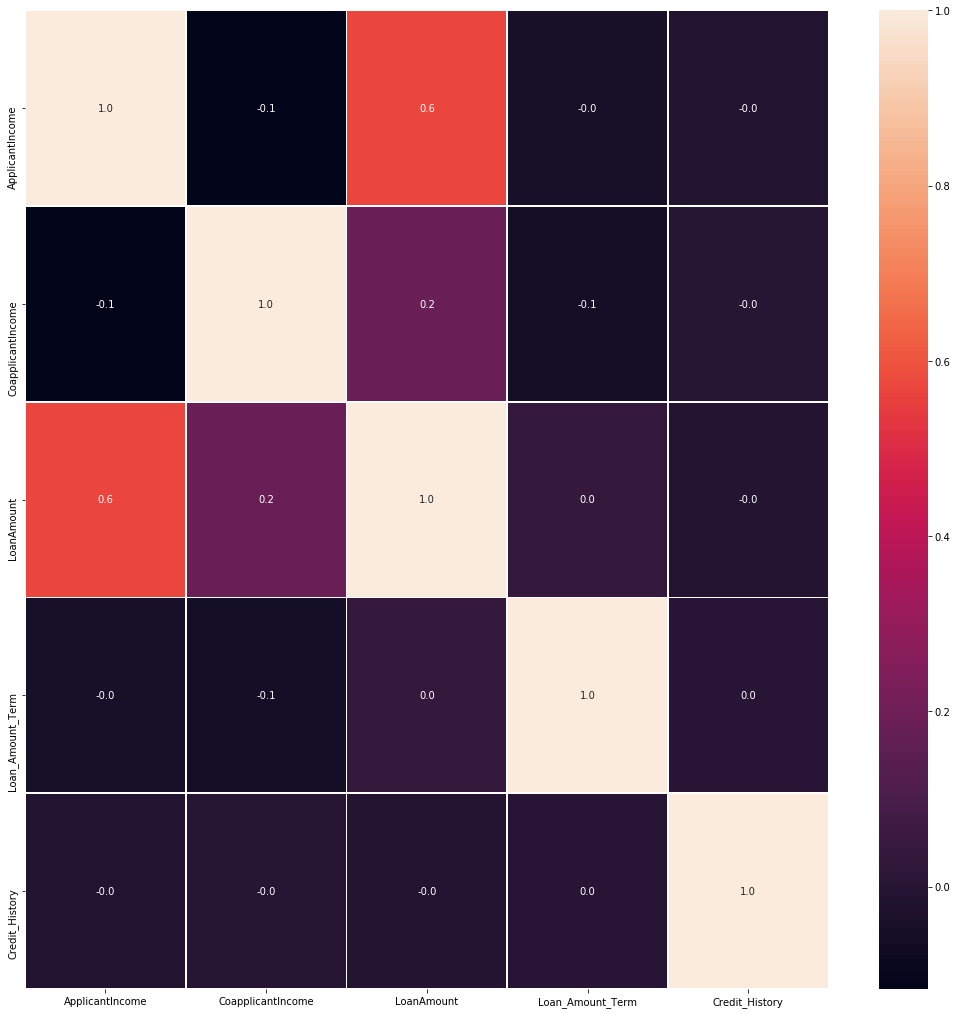

In [109]:
#correlation map to show us how the columns correlate with each other. Althought you can just use df.corr, I think this heat map is kind of cool
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()


In [110]:
print ('Chances of getting a Loan based on Credit History')
Loan_Chance = df.pivot_table('Loan_Status', index = ['Credit_History'], aggfunc = lambda x:x.map ({'Y':1, 'N':0}).mean())
Loan_Chance
#You can also make this pivot table in Excel
#It looks like if you do not have credit history, your chances of getting a loan are just belpw 8%. 
#If you do have credit history, your chances of getting a loan are just below 80%.
#How about the missing values?

Chances of getting a Loan based on Credit History


,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


Text(0.5,1,'Probability of getting loan based on credit history')

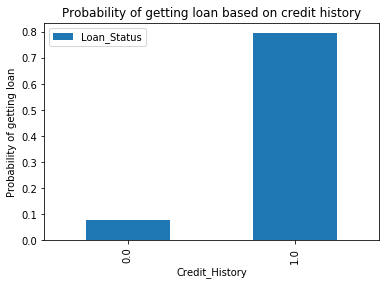

In [111]:
#fig = plt.figure(figsize=(6,4))
#ax1 = fig.add_subplot(121)
ax1 = Loan_Chance.plot(kind = 'bar')
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Probability of getting loan')
ax1.set_title("Probability of getting loan based on credit history")

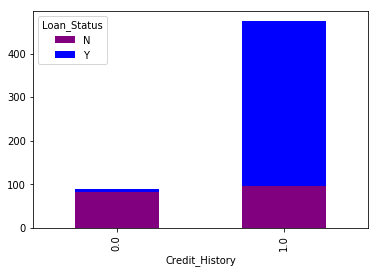

In [112]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['purple','blue'], grid=False)

In [113]:
print ('Chances of getting a Loan based on Education')
Loan_Chance_Education = df.pivot_table('Loan_Status', index = ['Education'], aggfunc = lambda x:x.map ({'Y':1, 'N':0}).mean())
Loan_Chance_Education
#It looks like if you do not graduate college, your chances of getting a loan are about 70%. 
#If you do have credit history, your chances of getting a loan are about 61%.
#How about the missing values? Explore for now, impute those later

Chances of getting a Loan based on Education


,Loan_Status
Education,
Graduate,0.708333
Not Graduate,0.611940


In [114]:
#Actually using groupby is easier
df.groupby(['Education'])['Loan_Status'].value_counts(normalize=True)

Education     Loan_Status
Graduate      Y              0.708333
              N              0.291667
Not Graduate  Y              0.611940
              N              0.388060
Name: Loan_Status, dtype: float64

Text(0.5,1,'Probability of getting loan based on Education')

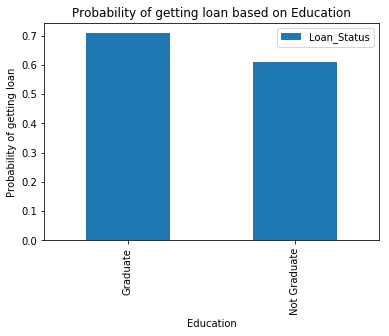

In [115]:
ax1 = Loan_Chance_Education.plot(kind = 'bar')
ax1.set_xlabel('Education')
ax1.set_ylabel('Probability of getting loan')
ax1.set_title("Probability of getting loan based on Education")

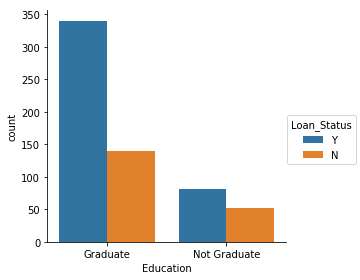

In [116]:
sns.factorplot(x="Education", hue = "Loan_Status", data=df, kind="count")

In [117]:
#Now let's start to explore the data, clean it up so that it's useful, and impute missing values
def missingvals(x):
    return sum(x.isnull())

In [118]:
print ("Missing values per column")
print (df.apply(missingvals))
print (df.apply(missingvals, axis = 1).head())

Missing values per column
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID
LP001002    1
LP001003    0
LP001005    0
LP001006    0
LP001008    0
dtype: int64


In [ ]:
#Drop the Loan_ID column since it won't help us making out model
df.drop(['Loan_ID'], axis=1, inplace=True)

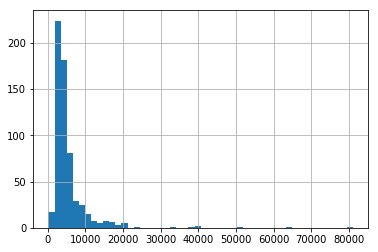

In [120]:
df['ApplicantIncome'].hist(bins=50)
#Let's take a look at ApplicantIncome altough there are no missing values
#It's really skewed to the right. There are also some outliers.

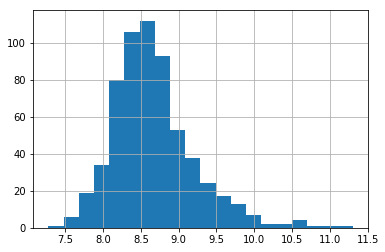

In [121]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20) 
#log of the TotalIncome looks much more normally distributed 

In [122]:
df['LoanAmount/TotalIncome'] =(df.LoanAmount/df.TotalIncome)
#Make this new column to possibly predict who can pay their loans back

In [123]:
df['Income_group'] = pd.qcut(df.TotalIncome, 10, labels=[0,1,2,3,4,5,6,7,8,9])
df['Income_group'] = df['Income_group'].astype(str)
# Here, I am splitting up the Total Income into 10 groups to see if there are any groups that are more likely to get a loan

In [124]:
df.groupby(['Education', 'Income_group', 'Gender', 'Self_Employed'])['LoanAmount'].median()

Education     Income_group  Gender  Self_Employed
Graduate      0             Female  No                71.0
                                    Yes               93.0
                            Male    No                71.0
                                    Yes               80.5
              1             Female  No               110.0
                                    Yes              122.0
                            Male    No               100.0
                                    Yes               25.0
              2             Female  No               111.5
                                    Yes               99.0
                            Male    No               100.0
                                    Yes              110.0
              3             Female  No               112.0
                                    Yes              133.0
                            Male    No               117.5
                                    Yes              118.0
      

In [125]:
df.groupby(['Income_group'])['Loan_Status'].value_counts(normalize=True)
#Income groups 2,5,8 get more loans

Income_group  Loan_Status
0             Y              0.612903
              N              0.387097
1             Y              0.688525
              N              0.311475
2             Y              0.737705
              N              0.262295
3             Y              0.661290
              N              0.338710
4             Y              0.704918
              N              0.295082
5             Y              0.770492
              N              0.229508
6             Y              0.645161
              N              0.354839
7             Y              0.693548
              N              0.306452
8             Y              0.733333
              N              0.266667
9             Y              0.629032
              N              0.370968
Name: Loan_Status, dtype: float64

In [126]:
#What percentage of LoanAmount data is missing?
#So 592/614 have values - 96% You are missing 4%.

In [127]:
df.groupby(['Education', 'Gender', 'Income_group', 'Self_Employed'])['LoanAmount'].median()

Education     Gender  Income_group  Self_Employed
Graduate      Female  0             No                71.0
                                    Yes               93.0
                      1             No               110.0
                                    Yes              122.0
                      2             No               111.5
                                    Yes               99.0
                      3             No               112.0
                                    Yes              133.0
                      4             No               132.0
                      5             No               148.5
                                    Yes              105.0
                      6             No               127.0
                      7             No               140.0
                                    Yes              194.0
                      8             No               214.0
                                    Yes              150.0
      

In [128]:
df['LoanAmount'] = df.groupby(['Education', 'Gender', 'Income_group', 'Self_Employed'])['LoanAmount'].apply(lambda x: x.fillna(x.mean()))
# We can just replace the 22 missing values with the mean of the LoanAmount for certain groups to get a more accurate dataset

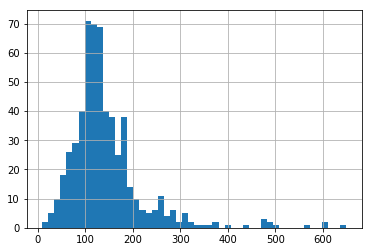

In [129]:
df['LoanAmount'].hist(bins=50) 
#There are outliers but it doesn't look at skewed

In [130]:
#We can just replace the 22 missing values with the mean of the LoanAmount so we do not skew the data too much
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [131]:
print (df.apply(missingvals))
#Now LoanAmount has no missing values

Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status                0
TotalIncome                0
TotalIncome_log            0
LoanAmount/TotalIncome    22
Income_group               0
dtype: int64


In [132]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [133]:
df.groupby(['Self_Employed'])['Loan_Status'].value_counts(normalize=True)
#There doesn't seem to be a correlation between being Self-Employed and getting a Loan

Self_Employed  Loan_Status
No             Y              0.686000
               N              0.314000
Yes            Y              0.682927
               N              0.317073
Name: Loan_Status, dtype: float64

In [134]:
582/614
#About 95% of data from the class Self_Employed is available. 

0.9478827361563518

In [135]:
df.loc[(df.Education == 'Graduate') & (df.Married == 'Yes')
          & (df.Dependents == '2') & (df.Gender == 'Male') & (df.Property_Area == 'Urban')
          & (df.Self_Employed.isnull() == True), 'Self_Employed'] = 'Yes'
#Good practice to change the test dataset as well
dftest.loc[(dftest.Education == 'Graduate') & (dftest.Married == 'Yes')
         & (dftest.Dependents == '2') & (dftest.Gender == 'Male') & (dftest.Property_Area == 'Urban')
         & (dftest.Self_Employed.isnull() == True), 'Self_Employed'] = 'Yes'
df['Self_Employed'].fillna('No', inplace=True)
dftest['Self_Employed'].fillna('No', inplace=True)

In [136]:
 df['Self_Employed'].fillna('No',inplace=True)
#inplace=True so I don't get a long list returned

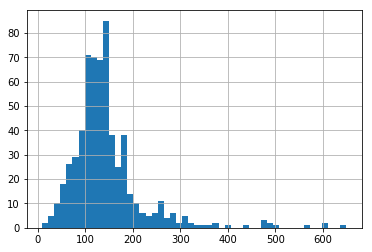

In [137]:
df['LoanAmount'].hist(bins=50) 


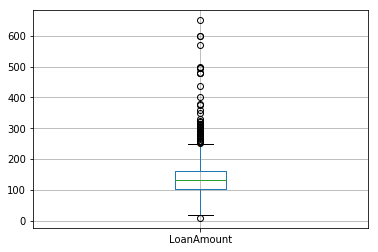

In [138]:
df.boxplot(column = 'LoanAmount')
#There are outliers that must be accounted for. You can tell because there are many values after the last max whisker.

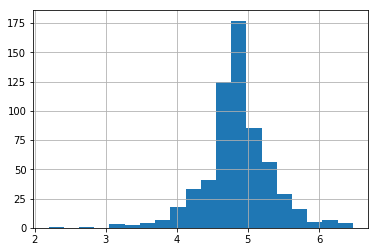

In [139]:
 df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)
#This gets rid of outliers in LoanAmount. The outliers may be due to people just asking for bigger loans.

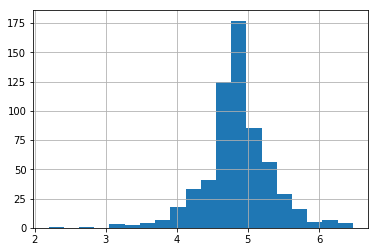

In [140]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 
#This gets rid of outliers in ApplicantIncome 

In [141]:
#Now let's fill in the missing values for Gender
len(df[df.Gender == 'Female']) + len(df[df.Gender == 'Male']) 
#There are 13 missing values for Gender. Also, we saw this before in the missingvals output.

601

In [142]:
df.groupby(['Gender'])['Loan_Status'].value_counts(normalize=True)
#There doesn't seem to be a strong correlation between Gender and Loan Status

Gender  Loan_Status
Female  Y              0.669643
        N              0.330357
Male    Y              0.693252
        N              0.306748
Name: Loan_Status, dtype: float64

In [143]:
df['Gender'].value_counts()
#Around 78% of Applicants are male

Male      489
Female    112
Name: Gender, dtype: int64

In [144]:
 df['Gender'].fillna('Male', limit = 10, inplace=True)
#Replace just 10 missing values with male and the rest female

In [145]:
 df['Gender'].fillna('Female', limit = 3, inplace=True)


In [146]:
print (df.apply(missingvals))
#Now Gender class has no more missing values

Gender                     0
Married                    3
Dependents                15
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status                0
TotalIncome                0
TotalIncome_log            0
LoanAmount/TotalIncome    22
Income_group               0
LoanAmount_log             0
dtype: int64


In [147]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [148]:
df.groupby(['Gender'])['Married'].value_counts(normalize=True)
#There doesn't seem to be a strong correlation between Mairtal status and Loan Status

Gender  Married
Female  No         0.719298
        Yes        0.280702
Male    Yes        0.736419
        No         0.263581
Name: Married, dtype: float64

In [149]:
df.loc[(df.Gender == 'Male') & (df.Married.isnull() == True), 'Married'] = 'Yes'

In [150]:
df.loc[(df.Gender == 'Female') & (df.Married.isnull() == True), 'Married'] = 'No'

In [157]:
df.Loan_Amount_Term.value_counts()
#This is interesting because the column is categorical, not continuous

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

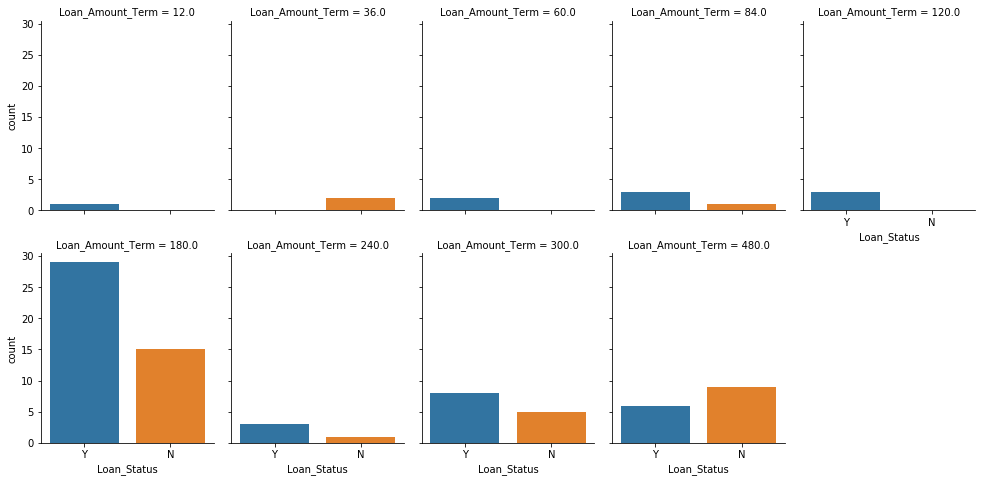

In [158]:
sns.factorplot("Loan_Status", col="Loan_Amount_Term", col_wrap=5,
               data=df.loc[df.Loan_Amount_Term !=360.], kind="count", size=3.4, aspect=.8)
#Let's see if there is a correlation for terms that are not 360 days since that is overwhelming majority of Loan Terms anyways
#There isn't really so let's just fill in 360 days for the missing values

In [159]:
df['Loan_group'] =  pd.qcut(df.LoanAmount, 10, labels=[0,1,2,3,4,5,6,7,8,9])

In [160]:
df.groupby(['Education', 'Income_group', 'Loan_group'])['Loan_Amount_Term'].apply(lambda x: x.mode())

Education     Income_group  Loan_group   
Graduate      0             0           0    360.0
                            1           0    360.0
                            2           0    360.0
                            3           0    360.0
                            4           0    360.0
                            5           0    360.0
                            7           0    360.0
                            9           0    360.0
              1             0           0    360.0
                            1           0    360.0
                            2           0    360.0
                            3           0    360.0
                            4           0    360.0
                            5           0    360.0
                            7           0    360.0
              2             0           0    360.0
                            1           0    360.0
                            2           0    360.0
                            3           

In [161]:
df['Loan_Amount_Term'].fillna(value = 360, inplace=True)
#There isn't really any correlations between Total Income and Loan Status or Loan Amount Term and Loan Status
#so let's just fill in 360 days for the missing values

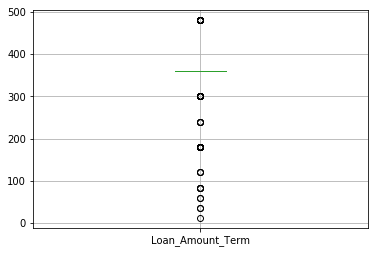

In [162]:
df.boxplot(column = 'Loan_Amount_Term')
#It looks like there are outliers but negligible

In [163]:
print (df.apply(missingvals))
#Now Gender class has no more missing values

Gender                     0
Married                    0
Dependents                15
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area              0
Loan_Status                0
TotalIncome                0
TotalIncome_log            0
LoanAmount/TotalIncome    22
Income_group               0
LoanAmount_log             0
Loan_group                 0
dtype: int64


In [164]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [165]:
df.groupby(['Dependents'])['Loan_Status'].value_counts(normalize=True)
#Applicanst with 2 dependents have a higher chance of getting a loan

Dependents  Loan_Status
0           Y              0.689855
            N              0.310145
1           Y              0.647059
            N              0.352941
2           Y              0.752475
            N              0.247525
3+          Y              0.647059
            N              0.352941
Name: Loan_Status, dtype: float64

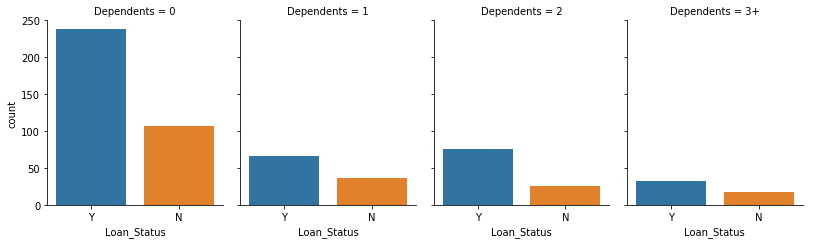

In [166]:
sns.factorplot("Loan_Status", col="Dependents", col_wrap=4, data=df, kind="count", size=3.5, aspect=.8)
#I made a bar graph just to get a better picture of the effect of having more and more dependents

In [167]:
df['Dependents'].fillna(value = 0, limit=9, inplace=True)

In [168]:
df['Dependents'].fillna(value = 1, limit=3, inplace=True)

In [169]:
df['Dependents'].fillna(value = 2, limit=3, inplace=True)

In [170]:
print (df.apply(missingvals))
#Now there are no missing values

Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area              0
Loan_Status                0
TotalIncome                0
TotalIncome_log            0
LoanAmount/TotalIncome    22
Income_group               0
LoanAmount_log             0
Loan_group                 0
dtype: int64


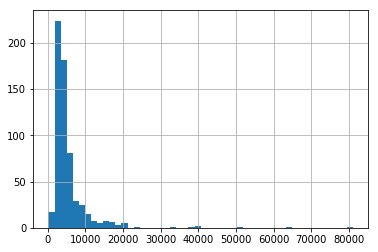

In [171]:
df['ApplicantIncome'].hist(bins=50)
#Let's take a look at ApplicantIncome altough there are no missing values
#It's really skewed to the right. There are also some outliers.

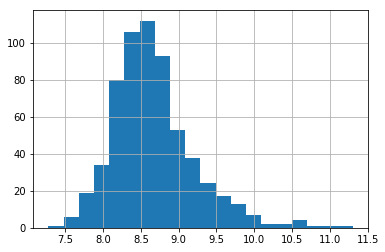

In [172]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20) 
#log of the TotalIncome looks much more normally distributed 

In [175]:
df['LoanAmount/TotalIncome'] =(df.LoanAmount/df.TotalIncome)
#Make this new column to possibly predict who can pay their loans back

In [153]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [174]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log,LoanAmount/TotalIncome,Income_group,LoanAmount_log,Loan_group
Loan_ID,,,,,,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,138.09375,360.0,1.0,Urban,Y,5849.0,8.674026,0.023610,5,4.927933,5
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N,6091.0,8.714568,0.021015,6,4.852030,4
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y,3000.0,8.006368,0.022000,0,4.189655,0
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y,4941.0,8.505323,0.024287,4,4.787492,3
LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y,6000.0,8.699515,0.023500,5,4.948760,5


In [56]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

C:\Users\David Pei\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [57]:
#Making classification model:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
    model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
  #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
    # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 

In [69]:
#Making a model with credit history using logistic regression
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.619%
Cross-Validation Score : 80.618%


In [71]:
#I added a few more variables to try and get something more accurate but this seems a bit suspicious. 
#Is this overfitting?
model = DecisionTreeClassifier()
predictor_var = ['Credit_History', 'LoanAmount', 'Loan_Amount_Term', 'TotalIncome']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 68.242%


In [78]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Credit_History','TotalIncome']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 97.883%
Cross-Validation Score : 71.499%


In [77]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','TotalIncome']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 98.697%
Cross-Validation Score : 67.756%
